In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
df

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94
5,18.0,5.22,3.32
6,18.7,5.20,3.12
7,19.0,5.64,3.05
8,19.6,5.14,3.04
9,20.0,5.08,2.77


In [3]:
df = df.to_numpy()

In [4]:
df.shape

(56, 3)

In [5]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df, perch_weight, random_state = 42)

In [7]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(x_train)
x_poly_train = poly.transform(x_train)
x_poly_train.shape

(42, 9)

In [8]:
x_poly_test = poly.transform(x_test)
x_poly_test.shape

(14, 9)

In [9]:
lr = LinearRegression()
lr.fit(x_poly_train, y_train)

LinearRegression()

In [10]:
lr.score(x_poly_train, y_train)

0.9903183436982124

In [11]:
lr.score(x_poly_test,y_test)

0.9714559911594122

In [12]:
#regularization

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
ss = StandardScaler()
ss.fit(x_poly_train)
x_scaled_train = ss.transform(x_poly_train)
x_scaled_test = ss.transform(x_poly_test)

In [15]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [16]:
ridge.fit(x_scaled_train, y_train)

Ridge()

In [17]:
ridge.score(x_scaled_train, y_train)

0.9857915060511934

In [18]:
ridge.score(x_scaled_test, y_test)

0.9835057194929058

In [19]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha= alpha)
    ridge.fit(x_scaled_train, y_train)
    train_score.append(ridge.score(x_scaled_train, y_train))
    test_score.append(ridge.score(x_scaled_test, y_test))

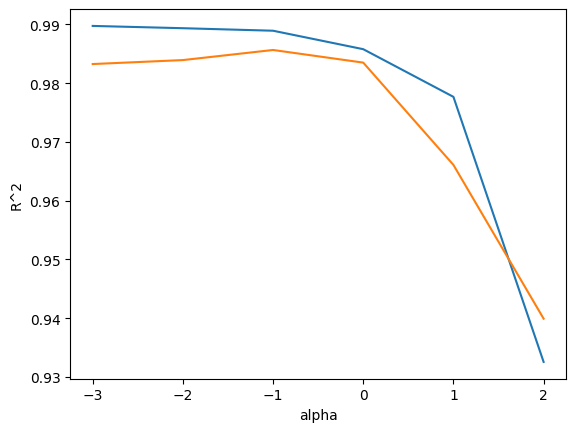

In [20]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [21]:
ridge = Ridge(alpha = 0.1)
ridge.fit(x_scaled_train, y_train)

Ridge(alpha=0.1)

In [22]:
print(ridge.score(x_scaled_train, y_train))
print(ridge.score(x_scaled_test, y_test))

0.9889354346720892
0.9856564835209132


In [23]:
from sklearn.linear_model import Lasso

In [24]:
lasso = Lasso()
lasso.fit(x_scaled_train, y_train)
lasso.score(x_scaled_train, y_train)

0.986591255464559

In [25]:
lasso.score(x_scaled_test, y_test)

0.9846056618190413

In [29]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10 , 100]
for alpha in alpha_list:
    lasso = Lasso(alpha = alpha, max_iter = 10000)
    lasso.fit(x_scaled_train, y_train)
    train_score.append(lasso.score(x_scaled_train, y_train))
    test_score.append(lasso.score(x_scaled_test, y_test))
    

/home/mxcoogi/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/home/mxcoogi/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.739e+03, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


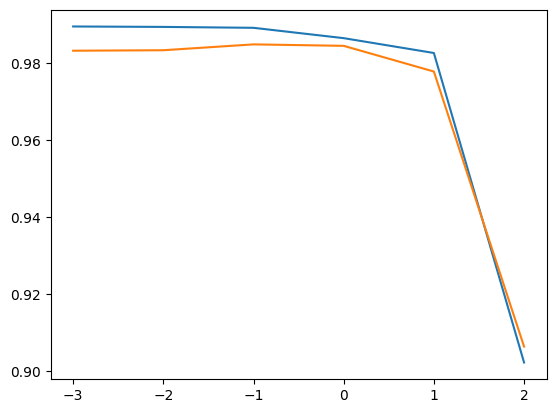

In [30]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

In [31]:
lasso = Lasso(alpha = 10)
lasso.fit(x_scaled_train, y_train)
print(lasso.score(x_scaled_train, y_train))
print(lasso.score(x_scaled_test, y_test))

0.9827254657543516
0.9778291802263332


In [34]:
np.sum(lasso.coef_ == 0)

4